# *Recognizing Handwritten Digits*

#### Name: Yash Ajit Paddalwar

## *Loading of the Dataset*

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

## *Shape of the Dataset*

In [8]:
digits.data.shape  # For overview of the number of rows and columns

(1797, 64)

## *Description of the Dataset*

In [12]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## *Images in the form of Array*

**The images of the handwritten digits are contained in a digits.images array. Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white, with a value of 0, to black, with the value 15.**

In [18]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [19]:
digits.images[4]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

## *Visualization of the array*

In [21]:
import matplotlib.pyplot as plt

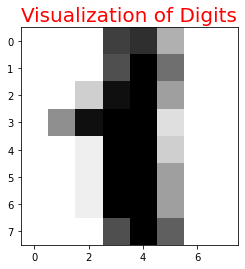

<Figure size 432x288 with 0 Axes>

In [35]:
plt.imshow(digits.images[1],cmap=plt.cm.gray_r,interpolation="nearest")
plt.title("Visualization of Digits",color="red",size=20)
plt.show()

# Saving the Image
plt.savefig('visualization of digit.jpg', dpi=100, bbox_inches='tight')

## *Visualization of Digits*

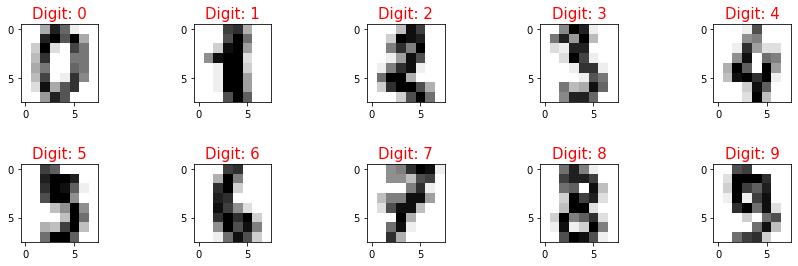

In [67]:
import numpy as np 
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels = list(zip(digits.images, digits.target))

for index,(image,label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: %i' % label, size =15 , color="red")
# save the figure
plt.savefig('Alldigits.png', dpi=300, bbox_inches='tight')

## *Flattening the Input Images*

In [84]:
c=0
for i in digits.images:
    c+=1
    
print(c)

1797


In [88]:
data = digits.images.reshape((c,-1))

## *Now we will see the Test Cases*

## **Case 1: Splitting the data with 0.01 test size**

In [89]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, digits.target, test_size=0.01, random_state=0)

## *Training and Prediction*

In [93]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)

In [94]:
svc.fit(xtrain, ytrain)

SVC(C=100.0, gamma=0.001)

In [96]:
ypred = svc.predict(xtest)
ypred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

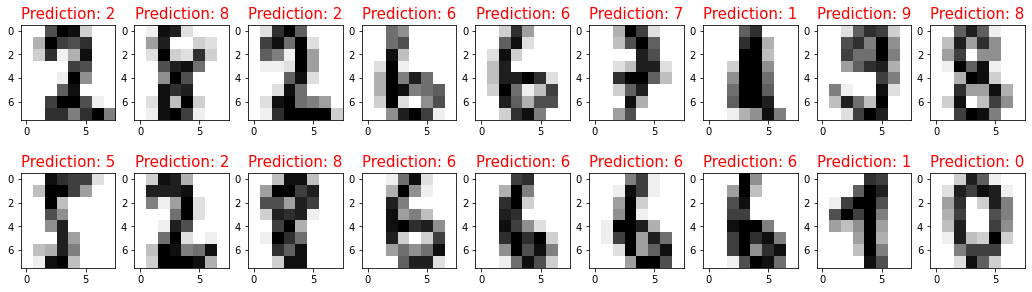

In [99]:
images_and_predictions = list(zip(xtest,ypred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction, size =15 , color="red")

# save the figure
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

## *Accuracy Score*

In [101]:
score = svc.score(xtest, ytest)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 1.0


In [104]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(ytest, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

df_cm

Predicted,0,1,2,5,6,7,8,9
Actual,,,,,,,,
0,1,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,0,6,0,0,0
7,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,3,0
9,0,0,0,0,0,0,0,1


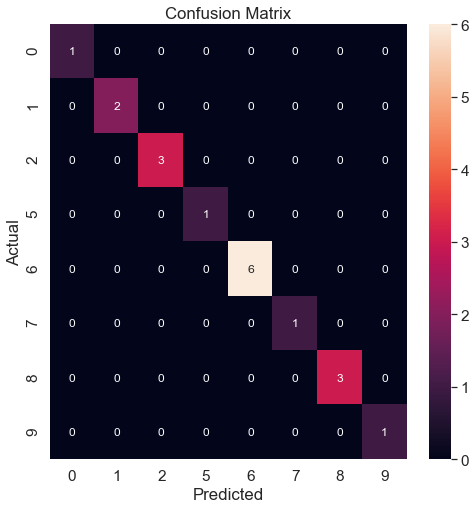

In [108]:
plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)      #for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('heatmap.png', dpi=100, bbox_inches='tight')

In [109]:
from sklearn.metrics import classification_report
cr=classification_report(ytest, ypred)
print("Classification report for SVM classifier:\n\n",cr)

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



## **Case 2: Splitting the data with 0.7 test size**

In [112]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.7, random_state=0)

In [114]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
score = svc.score(xtest, ytest)
print('Accuracy Score: {}'.format(score))

Accuracy Score: 0.9841017488076311


## **Case 3: Splitting the data with 0.9 test size**

In [115]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.9, random_state=0)

In [116]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
score = svc.score(xtest, ytest)
print('Accuracy Score: {}'.format(score))

Accuracy Score: 0.9684796044499382


## *Conclusion*

**The Model predicts the digits accurately almost 96% of the times**